In [5]:
!pip install nibabel
!pip install seaborn
!pip install openpyxl

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Input
from keras.layers import Convolution3D,Conv3D,Add,concatenate, MaxPool3D,add, Convolution2D,BatchNormalization, GlobalAveragePooling3D, ZeroPadding3D
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, MaxPool3D, Flatten, Dense, Dropout, concatenate, Lambda, Layer
from keras import backend as K
import cv2
import operator
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
import nibabel as nib
import pandas as pd
from scipy.ndimage import rotate
import random
import nibabel as nib
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import nibabel as nib
from matplotlib import animation, rc
from scipy.ndimage import rotate
import glob
import os
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split
from scipy.ndimage import zoom
from matplotlib.patches import PathPatch, Rectangle
from IPython.display import HTML
from tensorflow.keras import layers

from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, MaxPool3D, Flatten, Dense, Dropout, concatenate, Lambda, Layer
from tensorflow.keras.models import Model
import tensorflow as tf

In [7]:
luna_df = pd.read_excel('/kaggle/input/spie-cropped-resampled-dataset/final_Luna16.xlsx')
column_luna = 'malignancy'
luna_series=luna_df['Series Uid'].tolist()

luna_folder = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'  
luna = []
for i in luna_series:
    nii_file_path = os.path.join(luna_folder, f'{i}.nii')  # Assuming NII files have the extension '.nii'
    
    if os.path.exists(nii_file_path):
        luna.append(i)
luna=np.array(luna)

print(luna.shape)

(557,)


In [8]:
new_df = luna_df[['Series Uid', 'malignancy']]

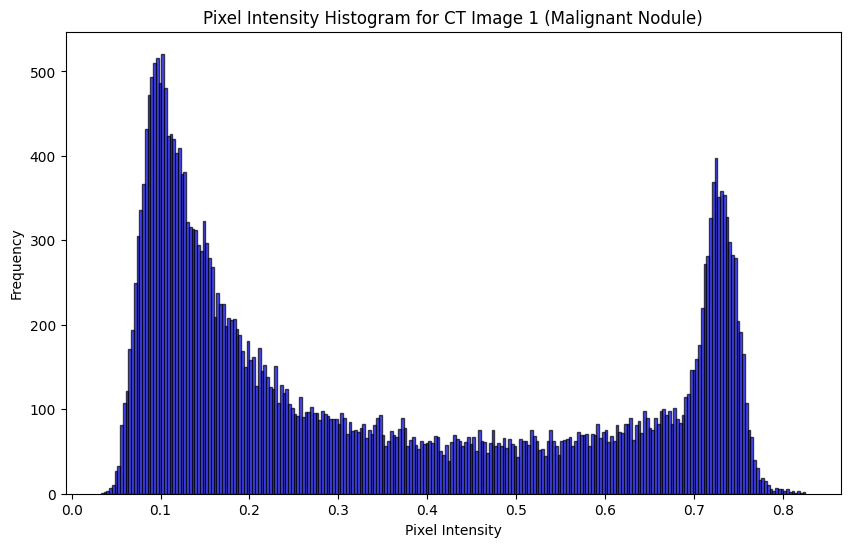

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192_0 is 1


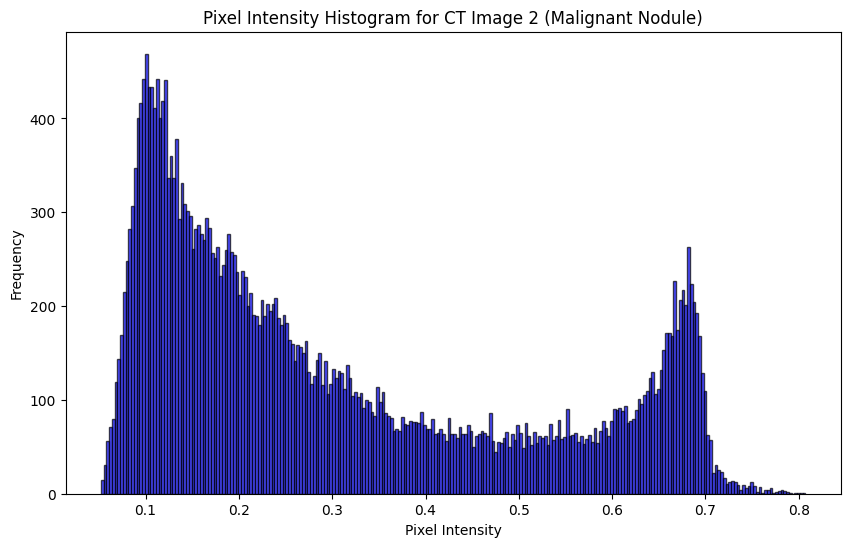

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264_3 is 1


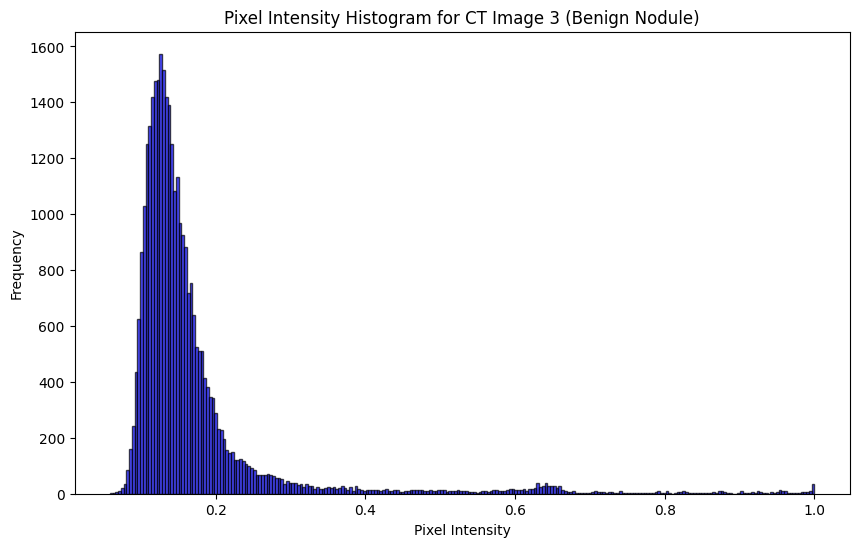

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.323541312620128092852212458228_4 is 0


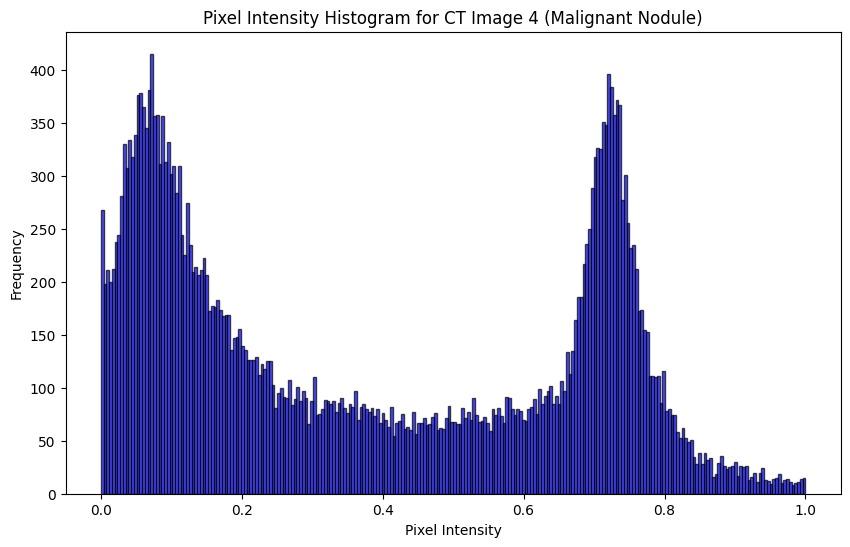

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.272348349298439120568330857680_7 is 1


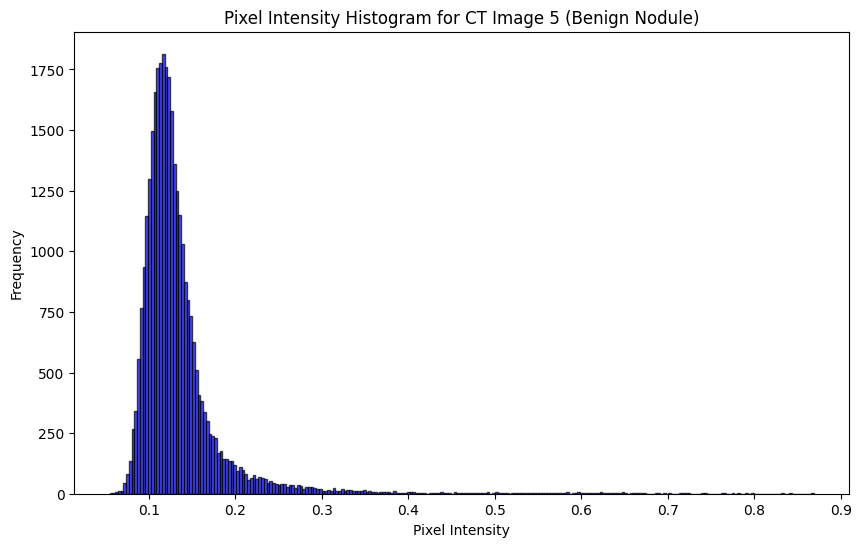

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.774060103415303828812229821954_8 is 0


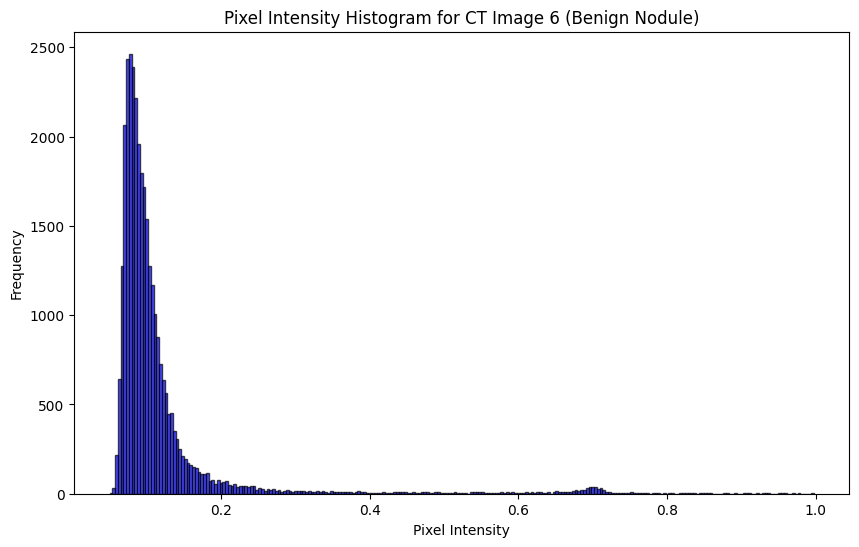

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.140253591510022414496468423138_11 is 0


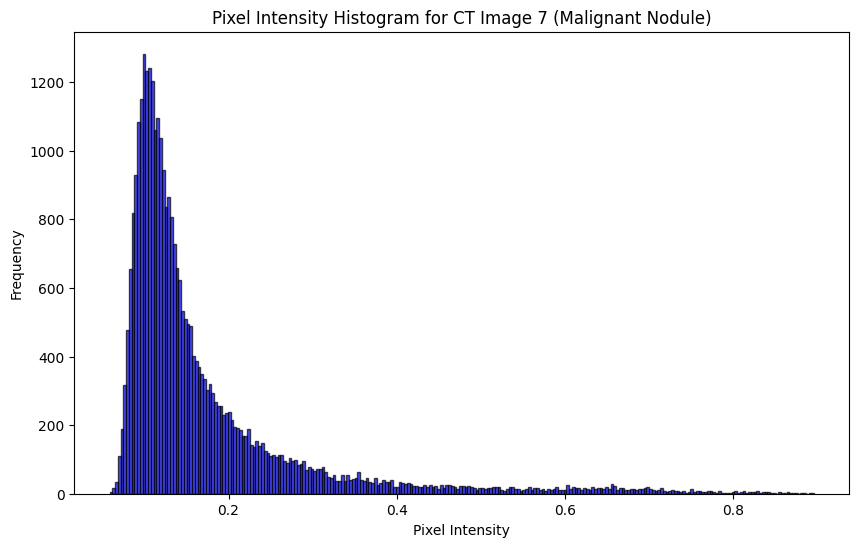

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.140253591510022414496468423138_12 is 1


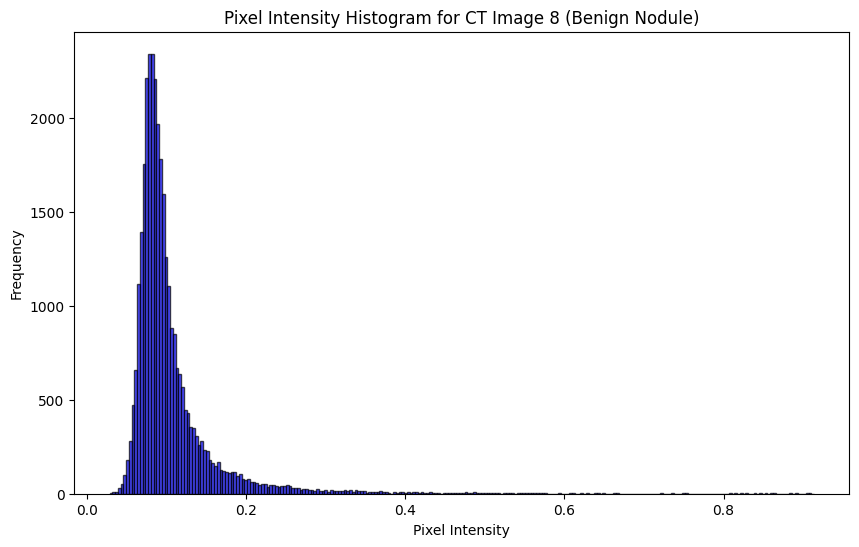

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842_14 is 0


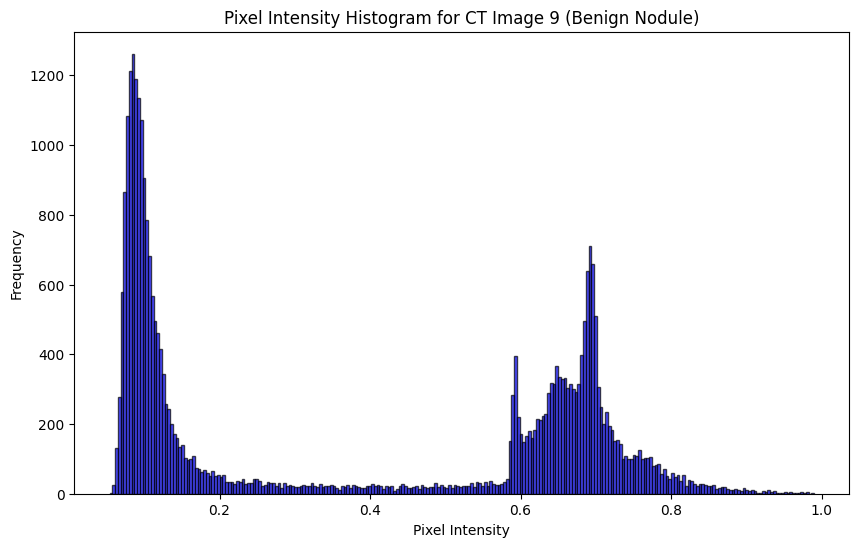

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842_15 is 0


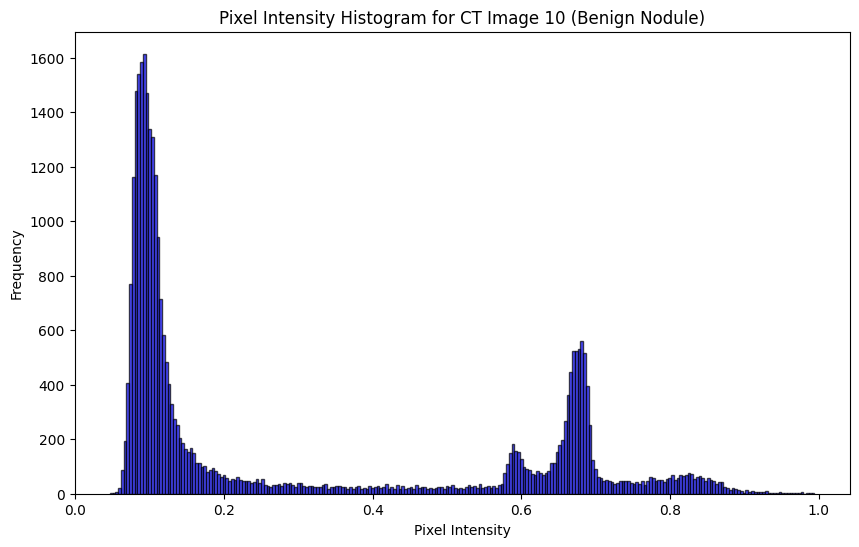

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842_16 is 0


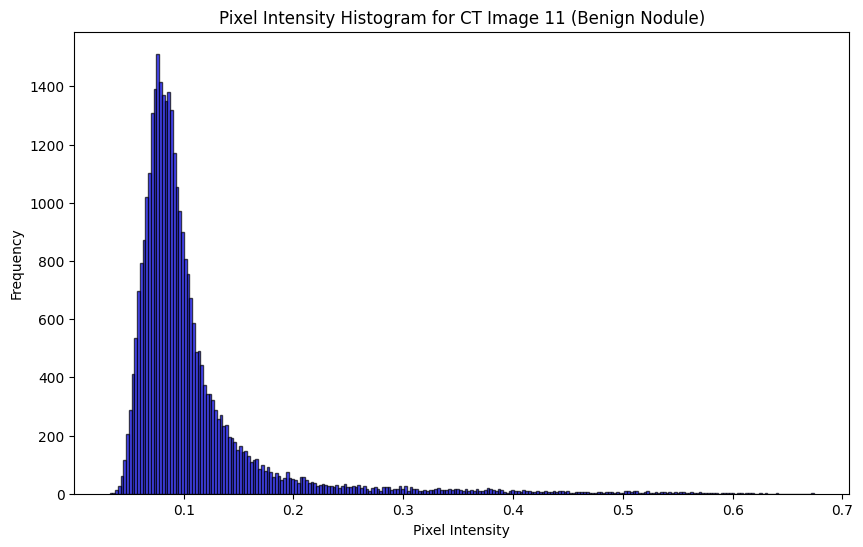

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842_17 is 0


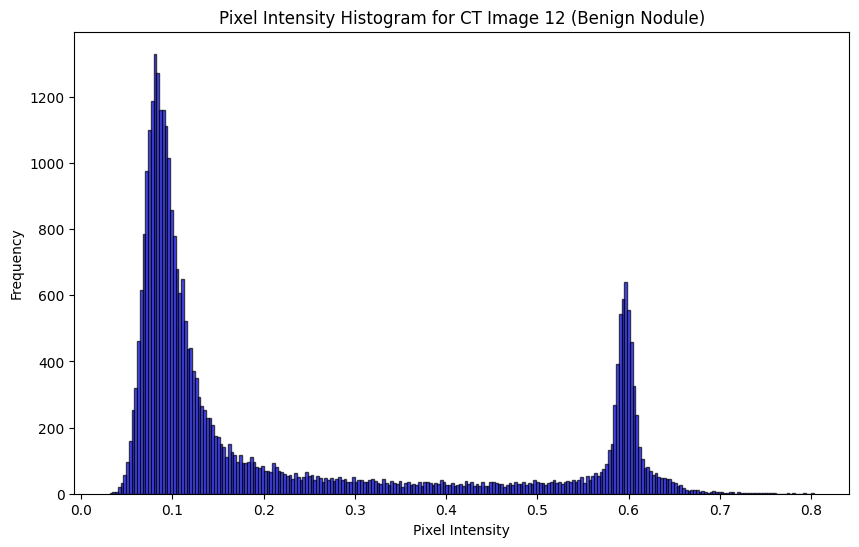

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842_18 is 0


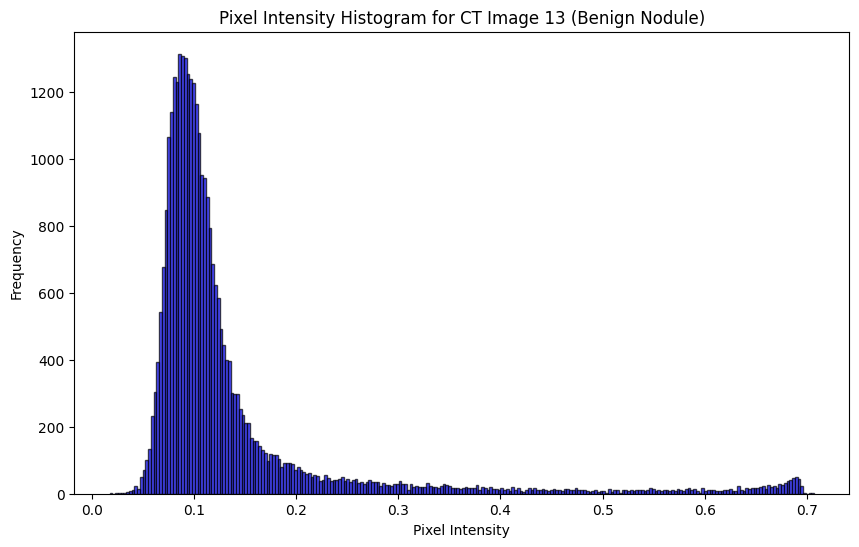

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842_19 is 0


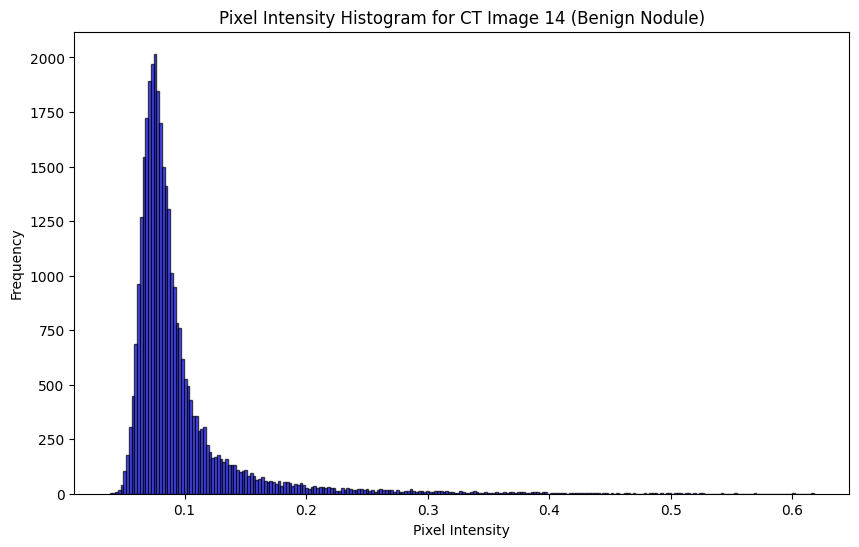

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842_20 is 0


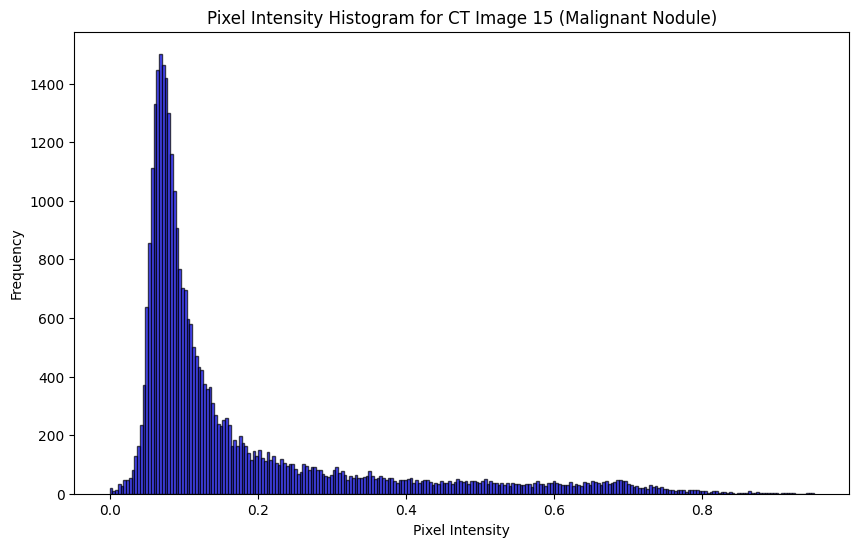

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.174907798609768549012640380786_23 is 1


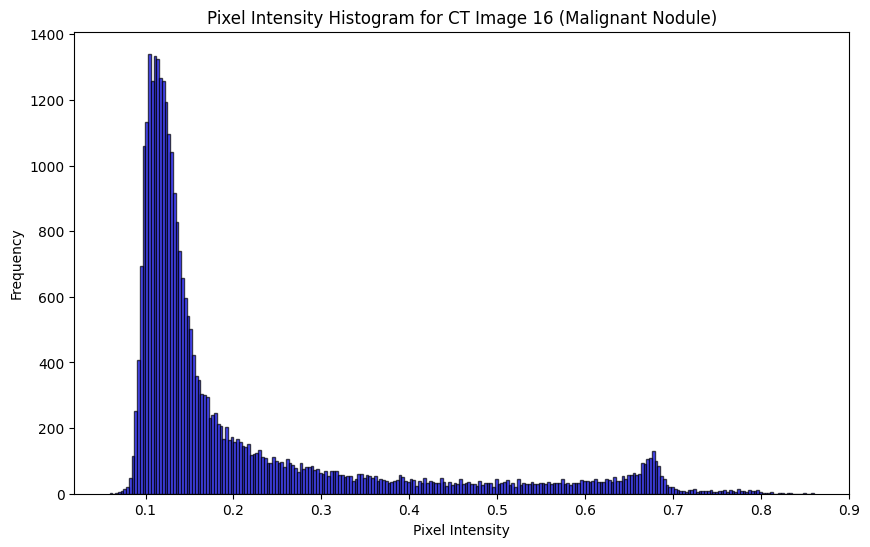

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.747803439040091794717626507402_25 is 1


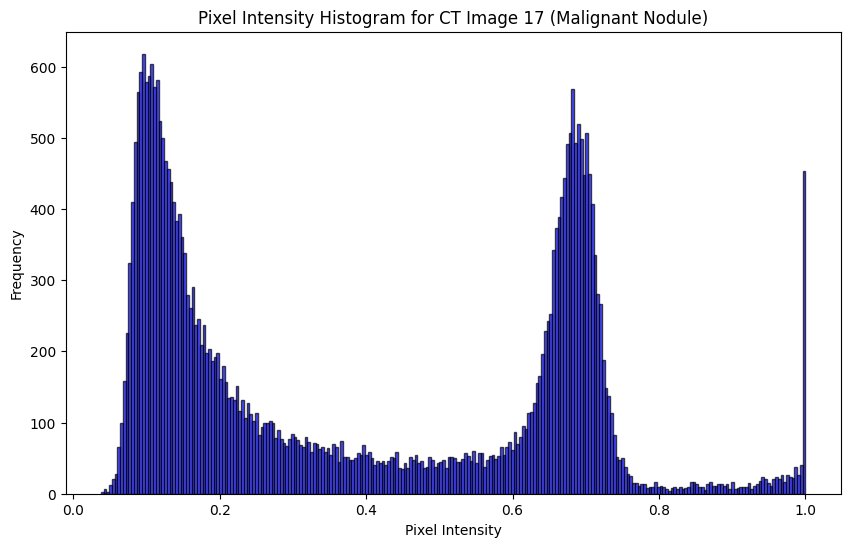

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.227962600322799211676960828223_26 is 1


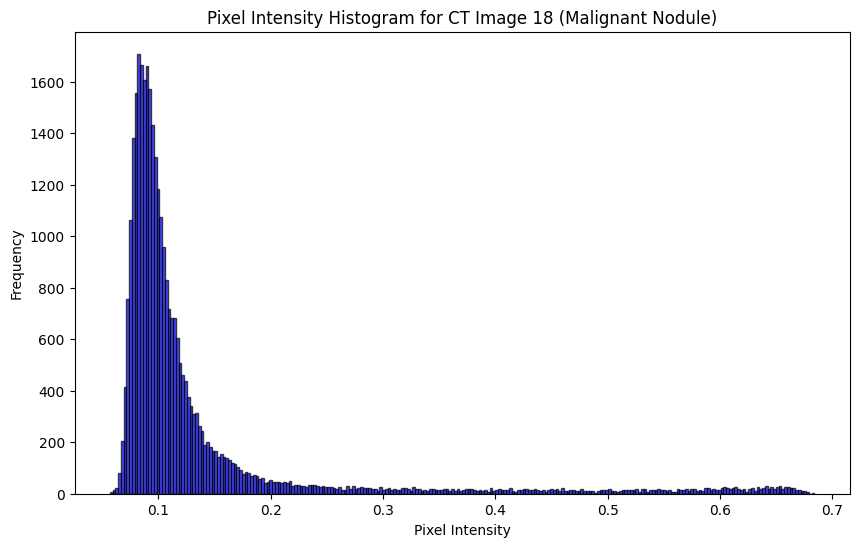

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_30 is 1


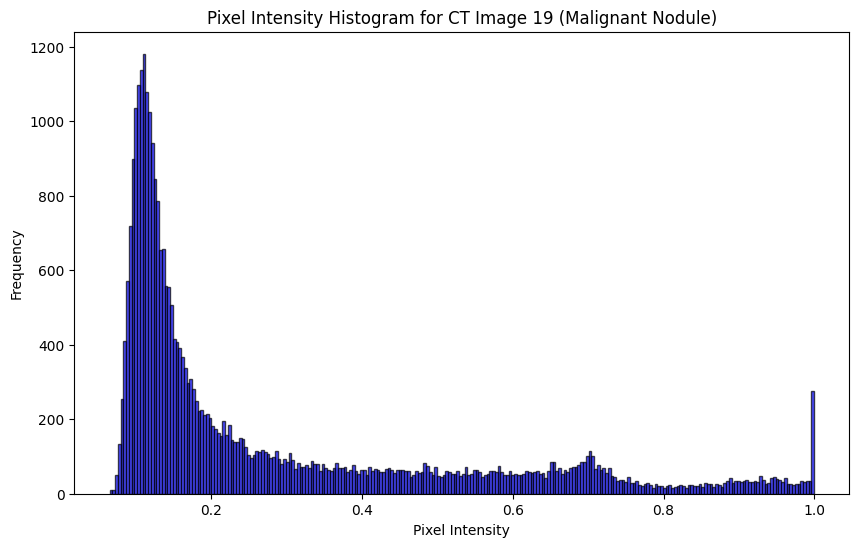

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_31 is 1


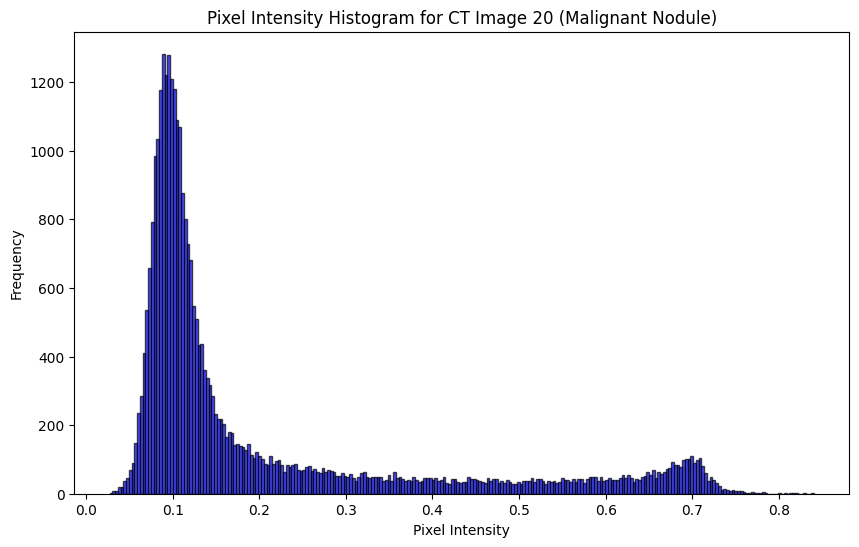

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.882070241245008756731854510592_33 is 1


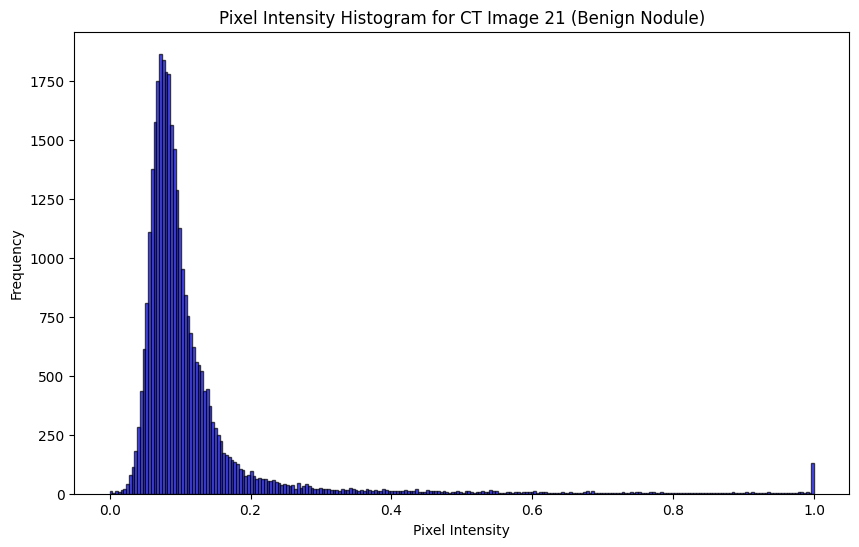

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.188265424231150847356515802868_38 is 0


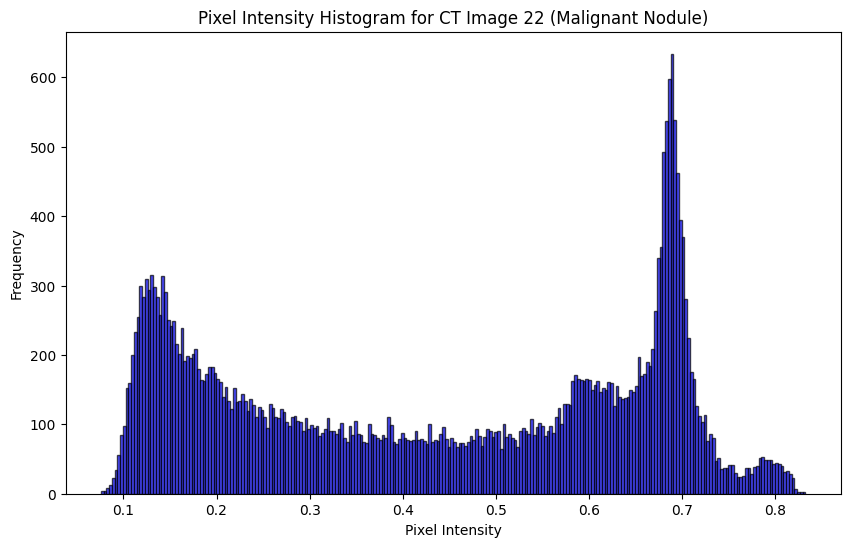

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.487745546557477250336016826588_39 is 1


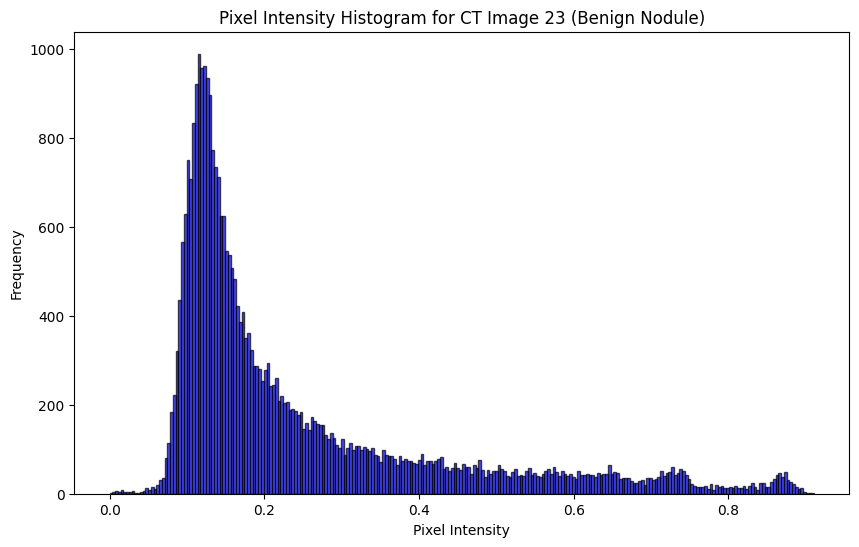

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.206028343897359374907954580114_40 is 0


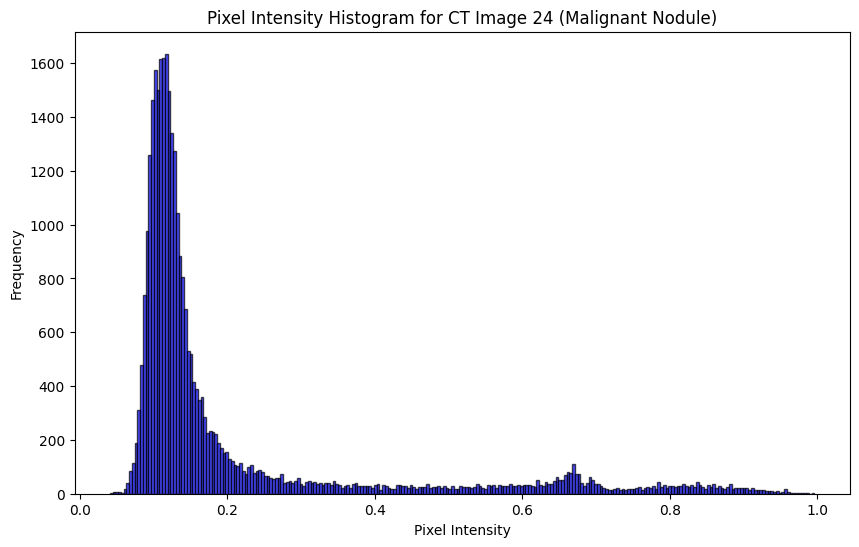

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.206028343897359374907954580114_41 is 1


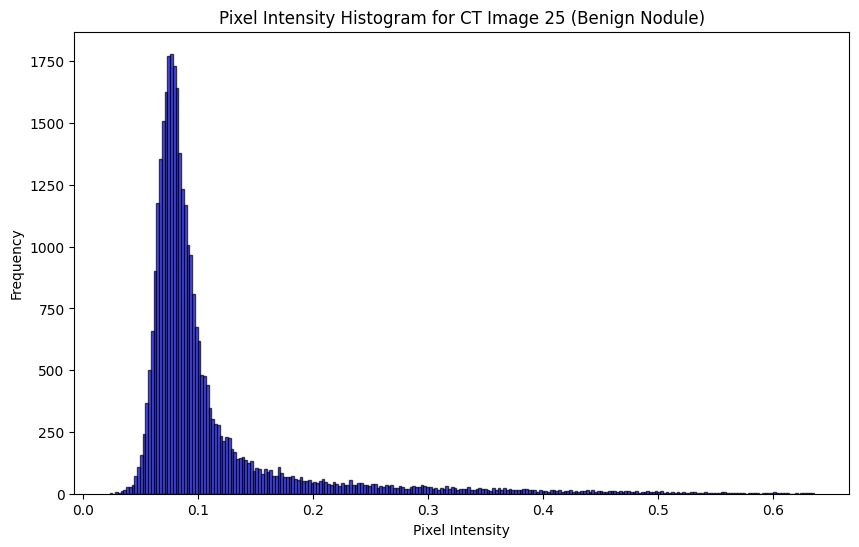

The malignancy number for 1.3.6.1.4.1.14519.5.2.1.6279.6001.183843376225716802567192412456_43 is 0


In [9]:
base_directory = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'

# Iterate through the first 20 entries in new_df
for index, row in new_df.head(25).iterrows():
    # Extract the 'Series Uid' to construct the file path
    series_uid = row['Series Uid']
    file_path = os.path.join(base_directory, f"{series_uid}.nii")

    # Check if the file exists before proceeding
    if os.path.exists(file_path):
        # Load the NIfTI file
        nifti_img = nib.load(file_path)

        # Get the image data as a NumPy array
        image_data = nifti_img.get_fdata()

        # Flatten the array to get pixel intensities in a 1D array
        pixel_intensities = image_data.flatten()

        # Determine if the nodule is benign or malignant
        malignancy_label = "Benign Nodule" if row['malignancy'] == 0 else "Malignant Nodule"

        # Plot the histogram
        plt.figure(figsize=(10, 6))
        plt.hist(pixel_intensities, bins=256, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f'Pixel Intensity Histogram for CT Image {index + 1} ({malignancy_label})')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()

        # Print the malignancy number
        print(f"The malignancy number for {series_uid} is {row['malignancy']}")
    else:
        print(f"File not found for {series_uid}")


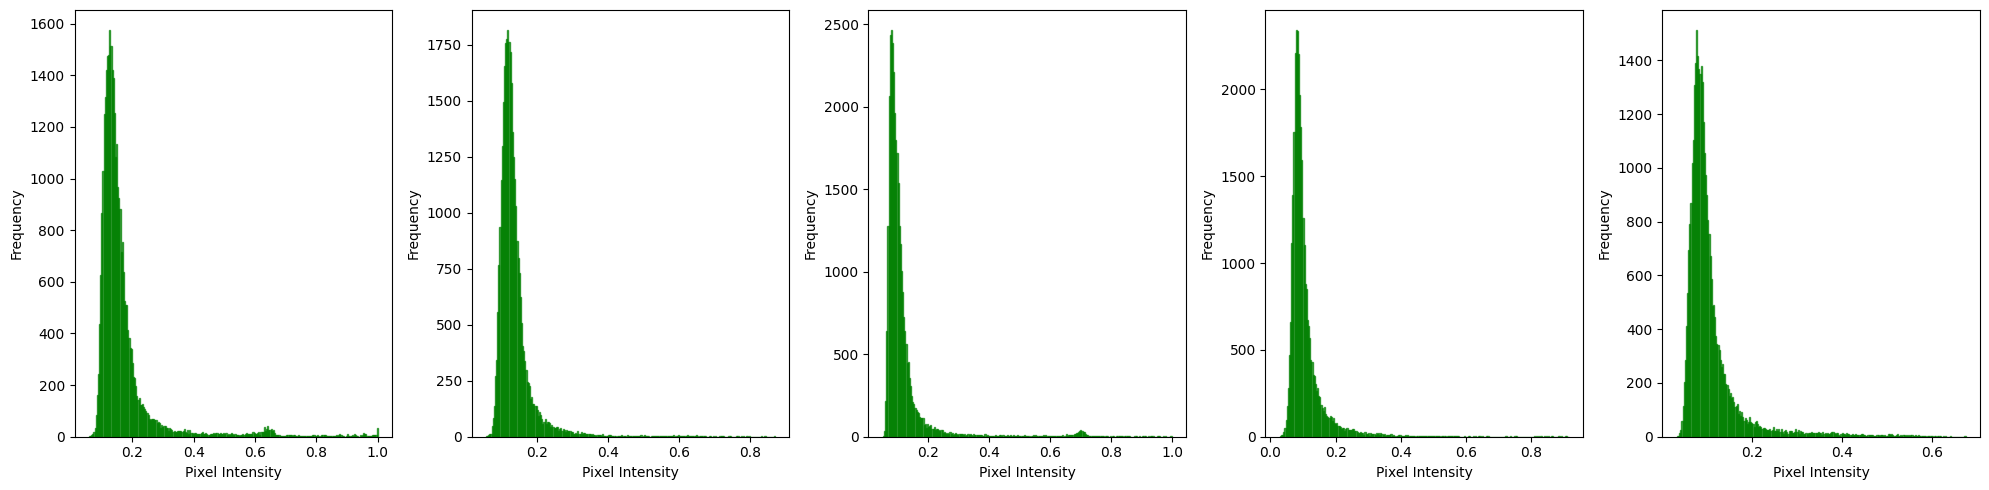

In [12]:
# Assuming new_df is already defined and contains the 'Series Uid' and 'malignancy' columns
# Define the base directory where the NIfTI files are stored
base_directory = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'

# Define the indices of the CT images you want to plot
ct_image_indices = [2, 4, 5, 7, 10]

# Set up the subplot grid
fig, axes = plt.subplots(1, len(ct_image_indices), figsize=(20, 5))

# Iterate through the specified CT images
for i, index in enumerate(ct_image_indices):
    # Check if index is within the bounds of the DataFrame
    if index < len(new_df):
        row = new_df.iloc[index]
        series_uid = row['Series Uid']
        file_path = os.path.join(base_directory, f"{series_uid}.nii")

        if os.path.exists(file_path):
            nifti_img = nib.load(file_path)
            image_data = nifti_img.get_fdata()
            pixel_intensities = image_data.flatten()

            # Plot the histogram in the corresponding subplot
            axes[i].hist(pixel_intensities, bins=256, color='green', alpha=0.7, edgecolor='green')
            axes[i].set_xlabel('Pixel Intensity')
            axes[i].set_ylabel('Frequency')
        else:
            axes[i].axis('off')  # Hide axis if file not found
    else:
        axes[i].axis('off')  # Hide axis if index is out of bounds

# Adjust layout
plt.tight_layout()
# Save the plot as an image file
output_file_path = '/kaggle/working/histograms_benign.png'  # Change this to your desired file path
plt.savefig(output_file_path)
plt.show()


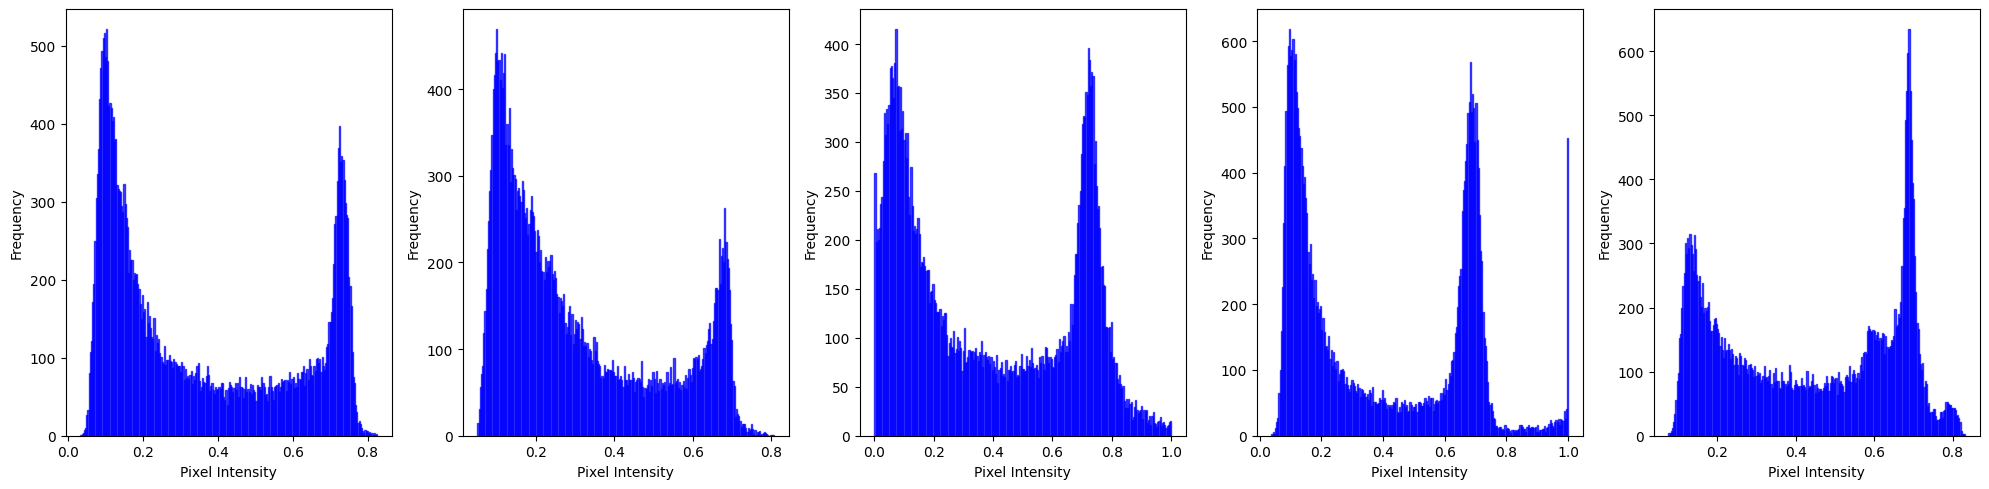

In [13]:
# Assuming new_df is already defined and contains the 'Series Uid' and 'malignancy' columns
# Define the base directory where the NIfTI files are stored
base_directory = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'

# Define the indices of the CT images you want to plot
ct_image_indices = [0, 1, 3, 16, 21]

# Set up the subplot grid
fig, axes = plt.subplots(1, len(ct_image_indices), figsize=(20, 5))

# Iterate through the specified CT images
for i, index in enumerate(ct_image_indices):
    # Check if index is within the bounds of the DataFrame
    if index < len(new_df):
        row = new_df.iloc[index]
        series_uid = row['Series Uid']
        file_path = os.path.join(base_directory, f"{series_uid}.nii")

        if os.path.exists(file_path):
            nifti_img = nib.load(file_path)
            image_data = nifti_img.get_fdata()
            pixel_intensities = image_data.flatten()

            # Plot the histogram in the corresponding subplot
            axes[i].hist(pixel_intensities, bins=256, color='blue', alpha=0.7, edgecolor='blue')
            axes[i].set_xlabel('Pixel Intensity')
            axes[i].set_ylabel('Frequency')
        else:
            axes[i].axis('off')  # Hide axis if file not found
    else:
        axes[i].axis('off')  # Hide axis if index is out of bounds

# Adjust layout
plt.tight_layout()
# Save the plot as an image file
output_file_path = '/kaggle/working/histograms_malignant.png'  # Change this to your desired file path
plt.savefig(output_file_path)
plt.show()
